
# DATA MINING LAB 1

# NORMALIZATION
1. MIN MAX= Formula: (X-X{min})/(X{max}-X{min})
2. Z SCORE= Formula: (X-mean )/std
3. DECIMAL SCALING: =X/10^{j}

In [4]:
import pandas as pd

In [76]:
df = pd.DataFrame({
    "Name":['Ganu','malli','benaka','anand','likhi'],
    "Regno": [101, 102, 103, 104, 105],
    "DOB": ['2004-10-01', '2005-0-11', '1999-06-26', '2001-11-18', '2007-02-22'],
    "Mark": [89, 32,None, 65, 89],
    "Grade": ['A+', 'A', 'B+', 'B', None],
    "Gender": ['M', 'M', 'M', None, 'F']})
df

,Name,Regno,DOB,Mark,Grade,Gender
0,Ganu,101,2004-10-01,89.0,A+,M
1,malli,102,2005-0-11,32.0,A,M
2,benaka,103,1999-06-26,NaN,B+,M
3,anand,104,2001-11-18,65.0,B,None
4,likhi,105,2007-02-22,89.0,None,F


In [78]:
df.head()

,Name,Regno,DOB,Mark,Grade,Gender
0,Ganu,101,2004-10-01,89.0,A+,M
1,malli,102,2005-0-11,32.0,A,M
2,benaka,103,1999-06-26,NaN,B+,M
3,anand,104,2001-11-18,65.0,B,None
4,likhi,105,2007-02-22,89.0,None,F


In [80]:
filterd=df.filter(["Name","Regno"])
filterd

,Name,Regno
0,Ganu,101
1,malli,102
2,benaka,103
3,anand,104
4,likhi,105


In [82]:
df=df.drop_duplicates()
df

,Name,Regno,DOB,Mark,Grade,Gender
0,Ganu,101,2004-10-01,89.0,A+,M
1,malli,102,2005-0-11,32.0,A,M
2,benaka,103,1999-06-26,NaN,B+,M
3,anand,104,2001-11-18,65.0,B,None
4,likhi,105,2007-02-22,89.0,None,F


In [84]:
missing=df.isnull().sum()
missing

Name      0
Regno     0
DOB       0
Mark      1
Grade     1
Gender    1
dtype: int64

In [86]:
df=df.dropna()
df

,Name,Regno,DOB,Mark,Grade,Gender
0,Ganu,101,2004-10-01,89.0,A+,M
1,malli,102,2005-0-11,32.0,A,M


In [88]:
df=df.rename(columns={"Regno":"Reg.No"})
df

,Name,Reg.No,DOB,Mark,Grade,Gender
0,Ganu,101,2004-10-01,89.0,A+,M
1,malli,102,2005-0-11,32.0,A,M


In [90]:
df.describe()

,Reg.No,Mark
count,2.000000,2.000000
mean,101.500000,60.500000
std,0.707107,40.305087
min,101.000000,32.000000
25%,101.250000,46.250000
50%,101.500000,60.500000
75%,101.750000,74.750000
max,102.000000,89.000000


In [92]:
min_marks=df["Mark"].min()
min_marks

32.0

In [94]:
max_marks=df["Mark"].max()
max_marks

89.0

In [96]:
mean_mark=df["Mark"].mean()
mean_mark

60.5

In [98]:
std_mark=df["Mark"].std()
std_mark

40.30508652763321

In [100]:
median_mark=df["Mark"].median()
median_mark

60.5

In [102]:
mode_mark=df["Mark"].mode()
mode_mark

0    32.0
1    89.0
Name: Mark, dtype: float64

In [104]:
var_mark=df["Mark"].var()
var_mark

1624.5

In [106]:
coeff=(std_mark/var_mark)*100
coeff

2.4810764252159565

In [108]:
quantile_mark=df["Mark"].quantile([.25,0.5,0.75])
quantile_mark

0.25    46.25
0.50    60.50
0.75    74.75
Name: Mark, dtype: float64

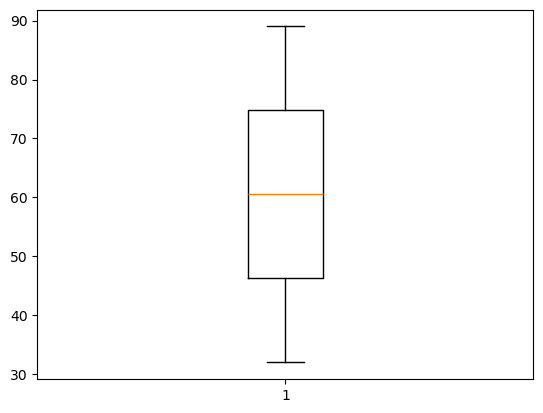

In [110]:
import matplotlib.pyplot as plt
plt.boxplot(df["Mark"])
plt.show()

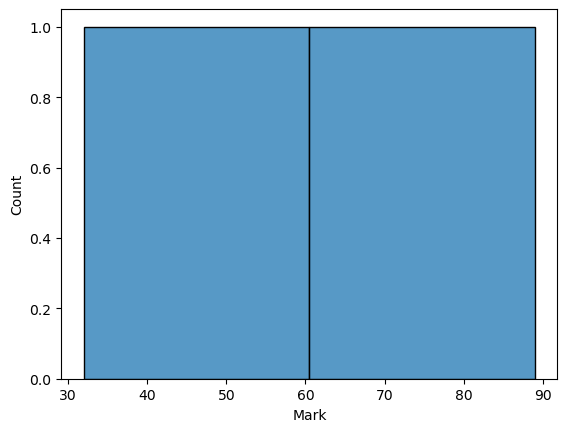

In [112]:
import seaborn as sns
sns.histplot(df["Mark"])
plt.show()

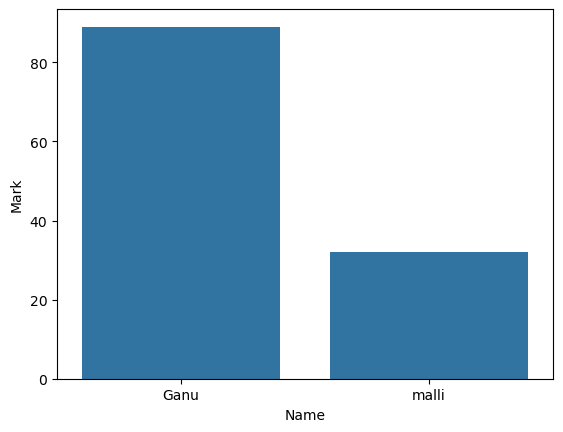

In [114]:
sns.barplot(x=df["Name"],y=df["Mark"])
plt.show()

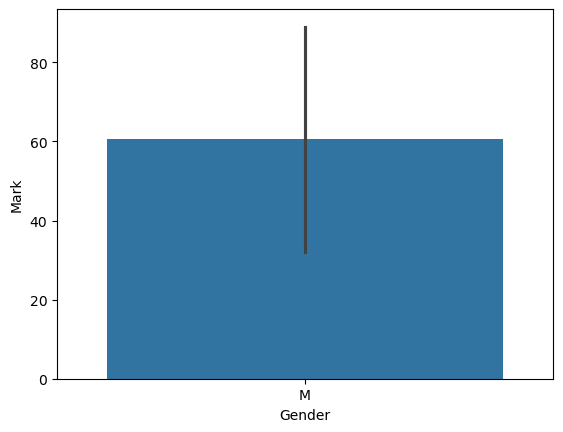

In [116]:
sns.barplot(x=df["Gender"],y=df["Mark"])
plt.show()

## MIN MAX

In [119]:
df['Mark_minmax'] = (df['Mark'] - min_marks) / (max_marks - min_marks)
df

,Name,Reg.No,DOB,Mark,Grade,Gender,Mark_minmax
0,Ganu,101,2004-10-01,89.0,A+,M,1.0
1,malli,102,2005-0-11,32.0,A,M,0.0


##  Z score

In [122]:
df['Z_score'] = (df['Mark'] - mean_mark) / std_mark
df[['Mark', 'Z_score']]

,Mark,Z_score
0,89.0,0.707107
1,32.0,-0.707107


## DECIMAL SCALING

In [125]:
from decimal import Decimal
df['scale_results'] = df['Mark'] / 100.0
df[['Mark', 'scale_results']]

,Mark,scale_results
0,89.0,0.89
1,32.0,0.32


In [127]:
filterd=df.filter(["Name","Reg.No","Mark","Mark_minmax","Z_score","scale_results"])
filterd

,Name,Reg.No,Mark,Mark_minmax,Z_score,scale_results
0,Ganu,101,89.0,1.0,0.707107,0.89
1,malli,102,32.0,0.0,-0.707107,0.32
